<a href="https://colab.research.google.com/github/kerul31/Google_Colab_Modules/blob/main/Interactive_modules/Cars_dataset_example_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory analysis and regression analysis for the cars dataset

First, import SASPy and import it to use SAS with Google Colab.

In [ ]:
!pip install saspy
import saspy
saspy

     |████████████████████████████████| 6.4MB 787kB/s 
  Created wheel for saspy: filename=saspy-3.7.2-cp37-none-any.whl size=6419248 sha256=25e1eb9791ce3c2d26c22316631644191789ccd00454989487b68fc4186faaa9
  Stored in directory: /root/.cache/pip/wheels/97/15/b9/04c61c8b6c0e6b28e8e8772af8b4e4b71312978e9107c3f71b
Successfully built saspy


<module 'saspy' from '/usr/local/lib/python3.7/dist-packages/saspy/__init__.py'>

Now, we need to connect to SASOnDemand academics account with respective username and password and start a SAS session.

In [ ]:
sas = saspy.SASsession(java='/usr/bin/java', iomhost=['odaws01-usw2.oda.sas.com','odaws02-usw2.oda.sas.com','odaws03-usw2.oda.sas.com','odaws04-usw2.oda.sas.com'], iomport=8591, encoding='utf-8')

Using SAS Config named: default
Please enter the IOM user id: kerulsuthar@gmail.com
Please enter the password for IOM user : ··········
SAS Connection established. Subprocess id is 124



Here we import and print the cars dataset.

In [ ]:
sas.submitLST("""
proc import data = sashelp.cars out=outcars;
proc print;
run;
""")

/usr/local/lib/python3.7/dist-packages/saspy/sasioiom.py:987: UserWarning: Noticed 'ERROR:' in LOG, you ought to take a look and see if there was a problem
  warnings.warn("Noticed 'ERROR:' in LOG, you ought to take a look and see if there was a problem")


The obs syntax can be used to restrict the number or observations printed incase of a large dataset. 

#### The dataset consists of information on cars like, make, model, car type, origin, price, engine size, cylinders, horsepower , mileage etc.

In [ ]:
sas.submitLST("""
proc print data = sashelp.cars (obs=10);
run;
""")

Obs,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
1,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6,265,17,23,4451,106,189
2,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4,200,24,31,2778,101,172
3,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4,200,22,29,3230,105,183
4,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6,270,20,28,3575,108,186
5,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6,225,18,24,3880,115,197
6,Acura,3.5 RL w/Navigation 4dr,Sedan,Asia,Front,"$46,100","$41,100",3.5,6,225,18,24,3893,115,197
7,Acura,NSX coupe 2dr manual S,Sports,Asia,Rear,"$89,765","$79,978",3.2,6,290,17,24,3153,100,174
8,Audi,A4 1.8T 4dr,Sedan,Europe,Front,"$25,940","$23,508",1.8,4,170,22,31,3252,104,179
9,Audi,A41.8T convertible 2dr,Sedan,Europe,Front,"$35,940","$32,506",1.8,4,170,23,30,3638,105,180
10,Audi,A4 3.0 4dr,Sedan,Europe,Front,"$31,840","$28,846",3.0,6,220,20,28,3462,104,179


The PROC MEANS and PROC UNIVARIATE are important ways to get an insight into descriptive statistics of data.

Here we analyze based on two categories. One where cars are grouped based on their origin for eg. Cars made in ASIA, EUROPE and USA.

And 2nd, where cars are grouped based on their type, for eg, Hybrid, Sedan, SUV etc.

With the PROC MEANS procedure in each of the cases, we can see the mean of the data points and variables under each of these categories, their standard deviation, minimum and maximum for continous variables.

More information on PROC MEANS: https://documentation.sas.com/?cdcId=pgmsascdc&cdcVersion=9.4_3.5&docsetId=proc&docsetTarget=n1qnc9bddfvhzqn105kqitnf29cp.htm&locale=en

More information on PROC UNIVARIATE:https://documentation.sas.com/?cdcId=pgmsascdc&cdcVersion=9.4_3.5&docsetId=procstat&docsetTarget=procstat_univariate_syntax01.htm&locale=en


In [ ]:
sas.submitLST("""
PROC MEANS DATA=sashelp.cars;
  CLASS origin ;
  title 'Based on location';
RUN;

""")



Origin,N Obs,Variable,Label,N,Mean,Std Dev,Minimum,Maximum
Asia,158,MSRP Invoice EngineSize Cylinders Horsepower MPG_City MPG_Highway Weight Wheelbase Length,Engine Size (L) MPG (City) MPG (Highway) Weight (LBS) Wheelbase (IN) Length (IN),158 158 158 156 158 158 158 158 158 158,24741.32 22602.18 2.7740506 5.1858974 190.7025316 22.0126582 28.2658228 3319.32 105.8860759 182.8164557,11321.07 9842.98 0.9023099 1.2690077 59.3926275 6.7333066 6.7705034 717.8421316 7.7352487 12.5641481,10280.00 9875.00 1.3000000 3.0000000 73.0000000 13.0000000 17.0000000 1850.00 89.0000000 153.0000000,89765.00 79978.00 5.6000000 8.0000000 340.0000000 60.0000000 66.0000000 5590.00 140.0000000 224.0000000
Europe,123,MSRP Invoice EngineSize Cylinders Horsepower MPG_City MPG_Highway Weight Wheelbase Length,Engine Size (L) MPG (City) MPG (Highway) Weight (LBS) Wheelbase (IN) Length (IN),123 123 123 123 123 123 123 123 123 123,48349.80 44395.08 3.2065041 6.2357724 251.8943089 18.7317073 26.0081301 3680.72 106.4471545 181.8455285,25318.60 23080.37 1.0371572 1.6795847 80.7388842 3.2895093 4.1675875 579.5768708 6.6900994 11.4798701,16999.00 15437.00 1.6000000 4.0000000 100.0000000 12.0000000 14.0000000 2524.00 93.0000000 143.0000000,192465.00 173560.00 6.0000000 12.0000000 493.0000000 38.0000000 46.0000000 5423.00 123.0000000 204.0000000
USA,147,MSRP Invoice EngineSize Cylinders Horsepower MPG_City MPG_Highway Weight Wheelbase Length,Engine Size (L) MPG (City) MPG (Highway) Weight (LBS) Wheelbase (IN) Length (IN),147 147 147 147 147 147 147 147 147 147,28377.44 25949.34 3.6428571 6.1088435 212.8231293 19.0748299 26.0136054 3769.95 112.0204082 193.9523810,11711.98 10518.72 1.1942212 1.5310899 63.7486181 3.9829920 5.3965824 855.3055237 8.7885896 15.3052652,10995.00 10319.00 1.6000000 4.0000000 103.0000000 10.0000000 12.0000000 2348.00 93.0000000 150.0000000,81795.00 74451.00 8.3000000 10.0000000 500.0000000 29.0000000 37.0000000 7190.00 144.0000000 238.0000000


### **Question: Use the PROC MEANS procedure and group the cars by their class/type**

**a) Which class has the highest number of samples?** \
**b) Which class has the minimum number of samples?** \
**c) Cars from which class has the largest average size of engine?** 

In [ ]:
######################################################

            # Enter your code in here #

######################################################


######################################################

                # Type your answers in here #

###################################################### 




## Analysis using a Scatter plot matrix.

Here, we can get insights into data points, the relation between variables etc, based on different groups.

More information on PROC SGSCATTER: https://documentation.sas.com/?cdcId=pgmsascdc&cdcVersion=9.4_3.5&docsetId=grstatproc&docsetTarget=p0lfzklhx36ylln1t9sssgzuf64m.htm&locale=en

Two scatter plots are plotted below.

1) Based on the origin of the car.
    For eg, the variables are grouped and color coded based on their manufacturing region, for eg, Asia, Europe and America

2) Based on the type drive train
    For eg, categorized based on the car being a All wheel drive, Front wheel drive or a rear wheel drive. 


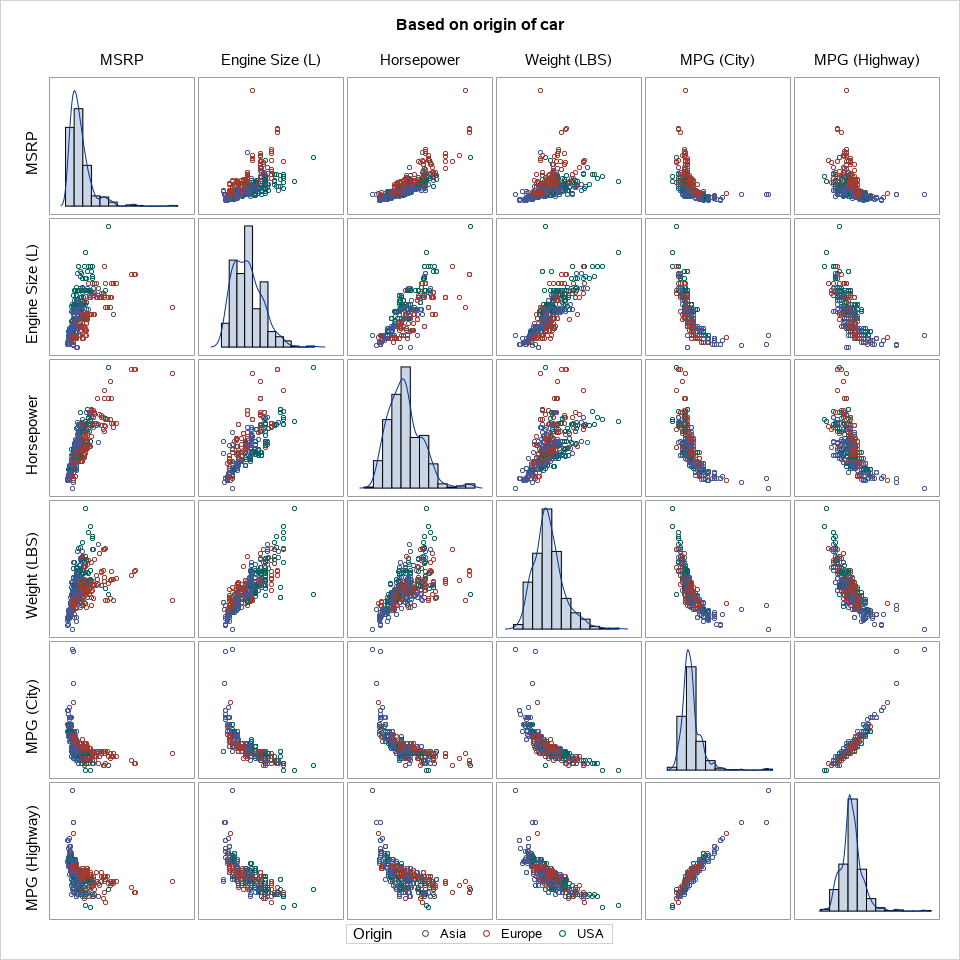

In [ ]:
sas.submitLST("""
proc sgscatter data=sashelp.cars; 
matrix msrp enginesize horsepower weight mpg_city mpg_highway /group=origin diagonal=(histogram kernel);
ods graphics on / width=10in height=10in;
 title 'Based on origin of car';
run;
""")

It can be seen from the scatter plot of Engine size vs MSRP that the Cars in USA with a larger engine size have a relatively lower price in comparison to the cars manufactured un europe. 

The cars manufactured in europe are costlier in comparison to cars manufactured in USA and Asia.

### **Question: Create a scatter plot matrix for all the predictors in the code above and group the observations based on their drive train. Comment on what do you observe based on teh scatter plot matrix.**

In [ ]:
######################################################

            # Enter your code in here #

######################################################

######################################################

                # Type your answers in here #

###################################################### 

### **Question: Create a scatter plot matrix for all the predictors in the code above and group the observations based on the car type. Comment on what do you observe based on teh scatter plot matrix.**

In [ ]:
######################################################

            # Enter your code in here #

######################################################

######################################################

                # Type your answers in here #

###################################################### 


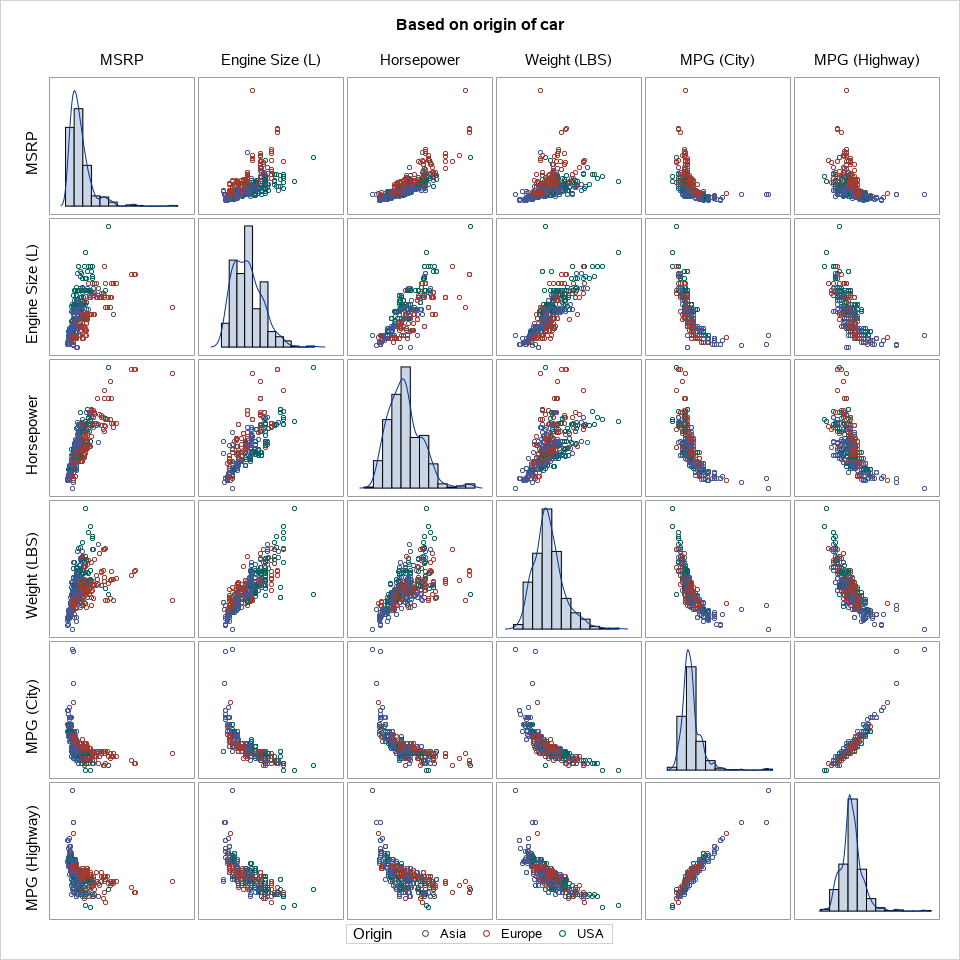

In [ ]:
sas.submitLST("""
proc sgscatter data=sashelp.cars; 
matrix msrp enginesize horsepower weight mpg_city mpg_highway /group=origin diagonal=(histogram kernel);
ods graphics on / width=10in height=10in;
 title 'Based on origin of car';
run;
""")

## Grouped Box plot 

The box plot below shows the important aspects of data grouped using different categories.


More information on PROC SGPANEL: https://documentation.sas.com/?cdcId=pgmsascdc&cdcVersion=9.4_3.5&docsetId=grstatproc&docsetTarget=p121sy0a2jycdfn13zygo90opvra.htm&locale=en



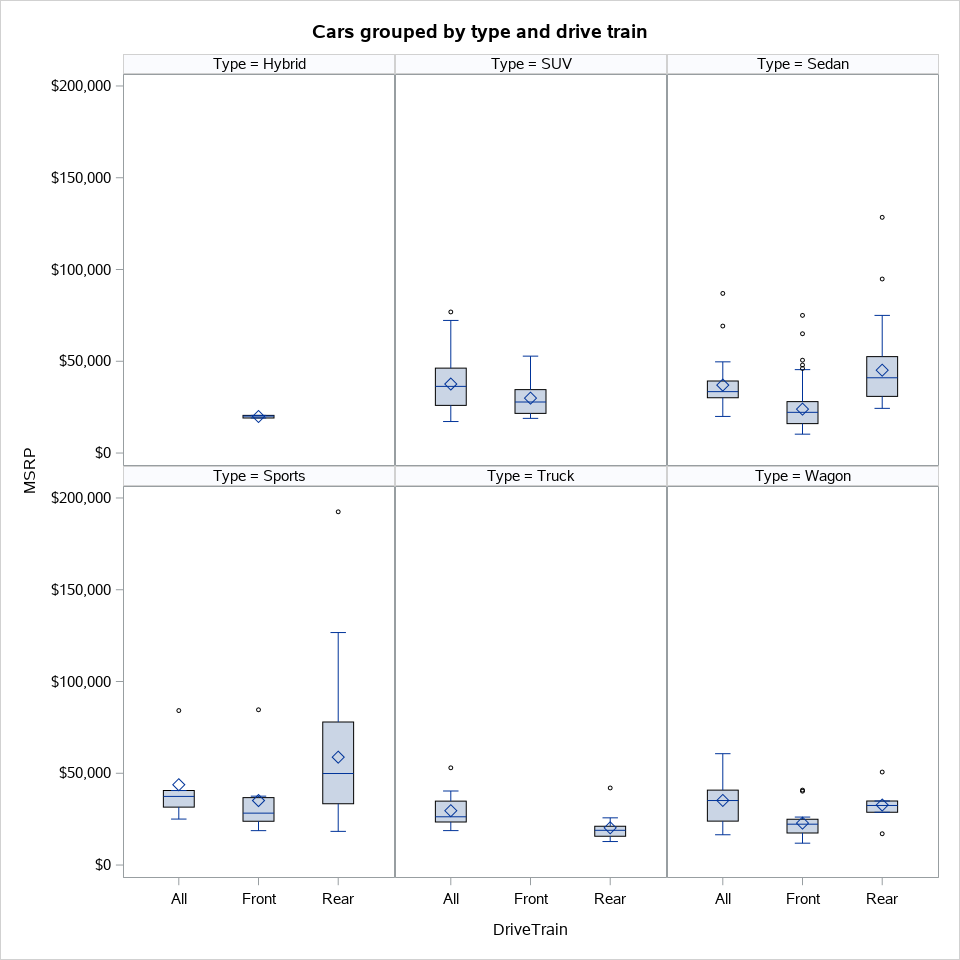

In [ ]:
sas.submitLST("""

proc sgpanel data=sashelp.cars;
panelby type / rows=2 columns=3;
vbox msrp / category= drivetrain;
title 'Cars grouped by type and drive train';
run;

""")

It is safe to say that All hybrid cars are only Front wheel drives. Also, no trucks are Front wheel drives and all SUV's are either All Wheel drive or Front wheel drives.

Also, the box plots are plotted in terms of MSRP for each of the categories sub grouped for their drive tains. It can be seen that Rear Wheel drive sports are are way costlier than a front wheel drive or all wheel drive sports car.

### **Question: Create a box plot where cars are grouped based on their type and origin**

**a) Cars from which country are relatively costlier?** \
**b) As per the dataset whcih is the only country that manufactures hybrid cars?**


In [ ]:
######################################################

            # Enter your code in here #

######################################################

######################################################

                # Type your answers in here #

###################################################### 

## Variable transformation

We need to transform the categorical variables into discrete numbers like 0,1 and 2.

In [ ]:
sas.submitLST("""
data h1a;
set sashelp.cars;
if origin = 'Asia' then origin_bin = 0;if origin = 'Europe' then origin_bin = 1; if origin = 'USA' then origin_bin = 2;
if drivetrain = 'All' then drive_bin = 0;if drivetrain= 'Front' then drive_bin = 1; if drivetrain= 'Rear' then drive_bin = 2;
proc print data = h1a (obs=10);
title 'Dummy variables added';
run;

""")

Obs,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,origin_bin,drive_bin
1,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6,265,17,23,4451,106,189,0,0
2,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4,200,24,31,2778,101,172,0,1
3,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4,200,22,29,3230,105,183,0,1
4,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6,270,20,28,3575,108,186,0,1
5,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6,225,18,24,3880,115,197,0,1
6,Acura,3.5 RL w/Navigation 4dr,Sedan,Asia,Front,"$46,100","$41,100",3.5,6,225,18,24,3893,115,197,0,1
7,Acura,NSX coupe 2dr manual S,Sports,Asia,Rear,"$89,765","$79,978",3.2,6,290,17,24,3153,100,174,0,2
8,Audi,A4 1.8T 4dr,Sedan,Europe,Front,"$25,940","$23,508",1.8,4,170,22,31,3252,104,179,1,1
9,Audi,A41.8T convertible 2dr,Sedan,Europe,Front,"$35,940","$32,506",1.8,4,170,23,30,3638,105,180,1,1
10,Audi,A4 3.0 4dr,Sedan,Europe,Front,"$31,840","$28,846",3.0,6,220,20,28,3462,104,179,1,1


## Correlation plot

The correlation plot is an important tool to examine the linear relationship between different variables.

A robust way to analyze the interaction and relationship between variables is the correlation matrix. Positive correlation defines how when one variables increases in magnitude, the other variable also increases or changes in similar direction. A negative correlation means when a variables increases in magnitude, the other variables decreses. 

The magnitude of correalation lies between -1 and +1. +1 means strongest positive relationship. -1 means strongest negative correlation. A correlation of 0 defines no linear relationship at all between two variables.

More information on PROC CORR: https://documentation.sas.com/?cdcId=pgmsascdc&cdcVersion=9.4_3.5&docsetId=procstat&docsetTarget=procstat_corr_syntax01.htm&locale=en



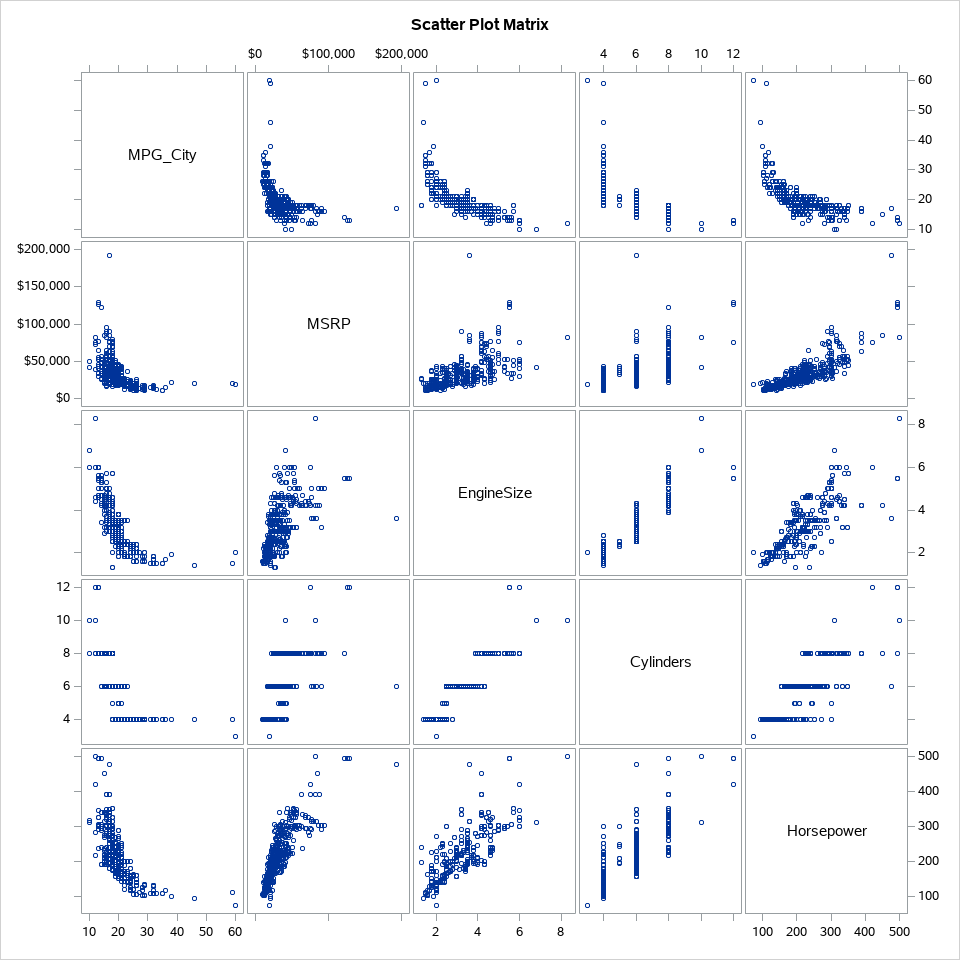

In [ ]:
sas.submitLST("""
ods graphics on;
title 'Correlation analysis';
proc corr data=h1a PLOTS(MAXPOINTS=30000)=matrix;
var  MPG_City MSRP EngineSize Cylinders Horsepower  MPG_Highway Weight Wheelbase Length origin_bin drive_bin;
run;
""")

Seeing the pearson's correlation coefficient above, it is seen that MPG_city i.e. the mileage is strongly correlated with MPG_highway, which is expected as they generally depend on each other. This is a case of collinearity. 

However, if we were to predict the mileage of a car based on the information we have we would want to look into a couple of important variables like weight, horsepower, engine size, cylinders etc.

It is seen that as the horsepower, cylinders, engine and weight have a negative correlation with the mileage of the car. That means, as these parameters increase the mileage of the car is supposed to be reducing. 

#### We will now try to predict the mileage of the car in city based on these important variables.


PROC REG is a procedure in SAS that alows us to model the linear relationship between different predictor variables and different independent variables

More information on PROC REG: https://documentation.sas.com/?cdcId=pgmsascdc&cdcVersion=9.4_3.4&docsetId=statug&docsetTarget=statug_reg_syntax01.htm&locale=en


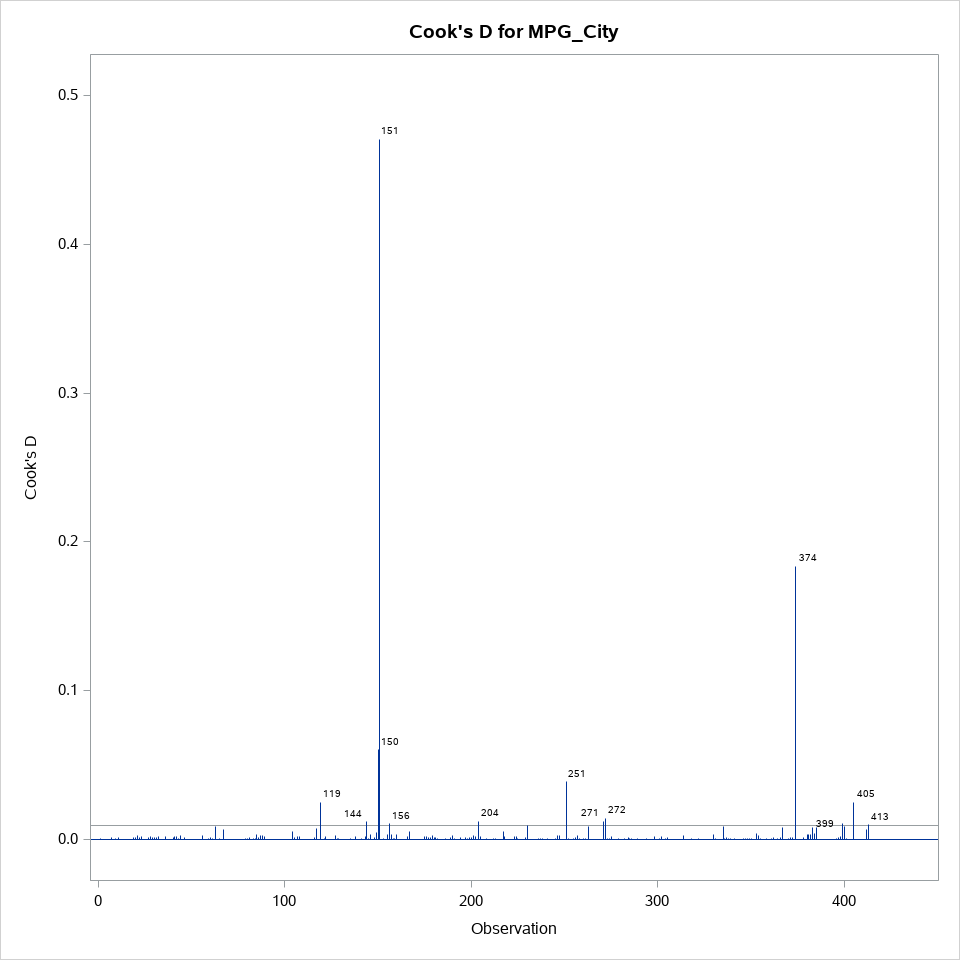
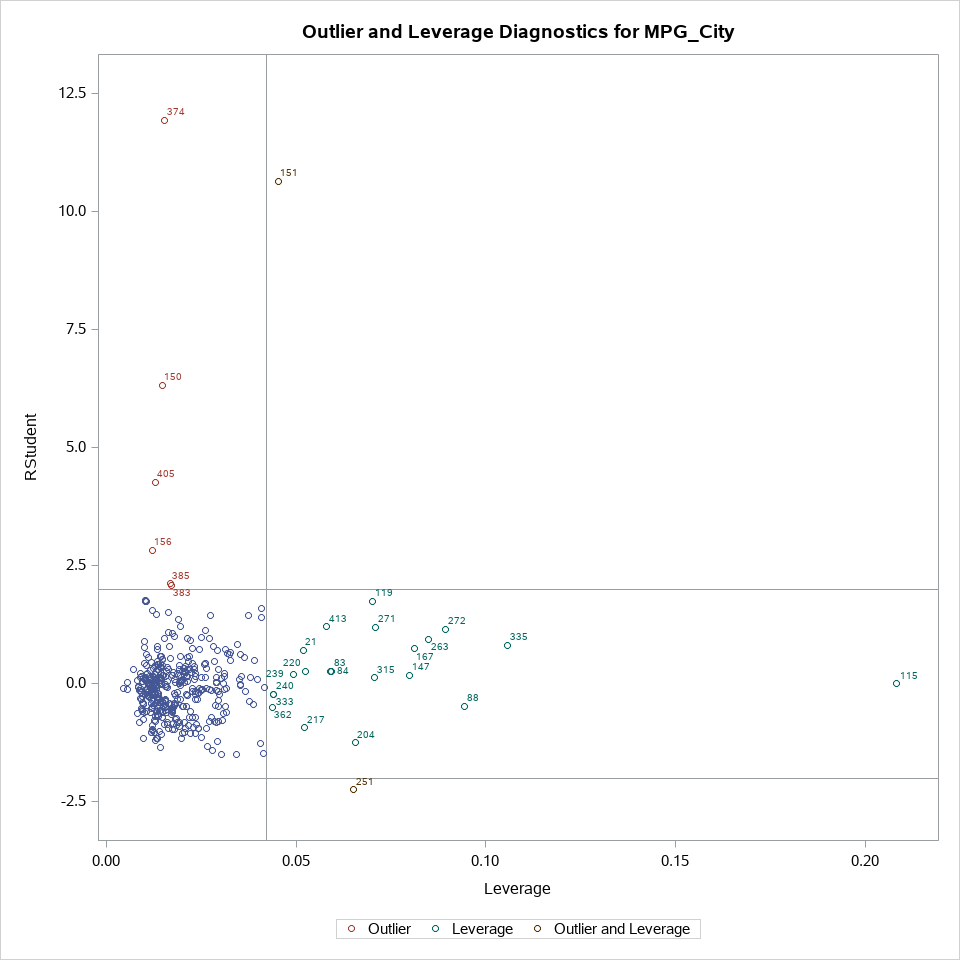

In [ ]:

sas.submitLST("""
title 'Regression analysis for mileage';
proc reg data=h1a
         plots(only label)=(RStudentByLeverage CooksD);
  model make ;
   model mpg_city = enginesize weight cylinders horsepower origin_bin drive_bin wheelbase length;
run;
""")

AS seen in the figure above, observation  115, 151 and 374 are extremes that can affect the model to a significant extent. So we will retrain our linear regression model after removing these 3 observations and see the difference.


First lets add id to the dataset to remove observations

In [ ]:

sas.submitLST("""
data h2a;
set h1a;
id = _N_;  
proc print data=h2a (obs=5);
title 'Addition of id';
run ;
""")






Obs,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,origin_bin,drive_bin,id
1,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6,265,17,23,4451,106,189,0,0,1
2,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4,200,24,31,2778,101,172,0,1,2
3,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4,200,22,29,3230,105,183,0,1,3
4,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6,270,20,28,3575,108,186,0,1,4
5,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6,225,18,24,3880,115,197,0,1,5


### **Question : Remove data points 115,151 and 374. Name the new dataset as "new". Print the new dataset and just display the first 10 observations.**

In [ ]:
######################################################

            # Enter your code in here #

######################################################

### **Question : Perform regression analysis after removing the outliers on the new dataset. Creat all the important plots. Use the same predictors as the section above and comment on your results**

**a) Do you see any imporvement?** \
**b) Report the new adjusted R^2 and R^2**

In [ ]:
######################################################

            # Enter your code in here #

######################################################

######################################################

                # Type your answers in here #

###################################################### 

## Model selection
Feature selection to select the best model using Sequential feature selection. This way, one can select different models and find the best fit based on features.

Data Set,WORK.NEW
Dependent Variable,MPG_City
Selection Method,Stepwise
Select Criterion,Significance Level
Stop Criterion,Significance Level
Choose Criterion,PRESS
Entry Significance Level (SLE),0.15
Stay Significance Level (SLS),0.15
Effect Hierarchy Enforced,None
Number of Observations Read,425
Number of Observations Used,423

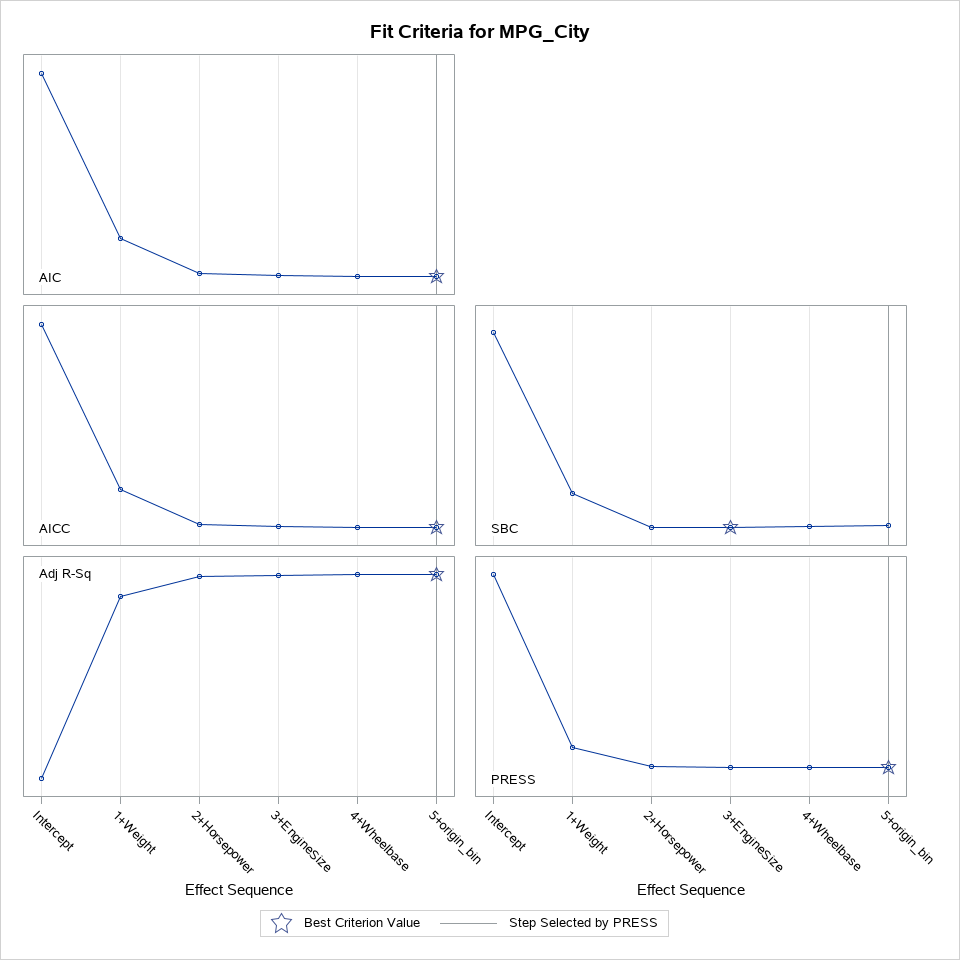

In [ ]:
sas.submitLST("""
ods graphics on;

proc glmselect data=new plot=CriterionPanel;
   model mpg_city = enginesize weight cylinders horsepower origin_bin drive_bin wheelbase length
                / selection=stepwise(select=SL choose=PRESS);;
title 'Stepwise feature selection to build the best model';
run;
""")

Now let's see if taking the logarithmic transform of the mileage variable helps.

In [ ]:
sas.submitLST("""
data new2;
set h2a;
mpg_log=log(mpg_city);
proc print data = new2 (obs=5);
title 'Logarithmic transform of MPG_city';
run;

""")

Obs,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,origin_bin,drive_bin,id,mpg_log
1,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6,265,17,23,4451,106,189,0,0,1,2.83321
2,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4,200,24,31,2778,101,172,0,1,2,3.17805
3,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4,200,22,29,3230,105,183,0,1,3,3.09104
4,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6,270,20,28,3575,108,186,0,1,4,2.99573
5,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6,225,18,24,3880,115,197,0,1,5,2.89037



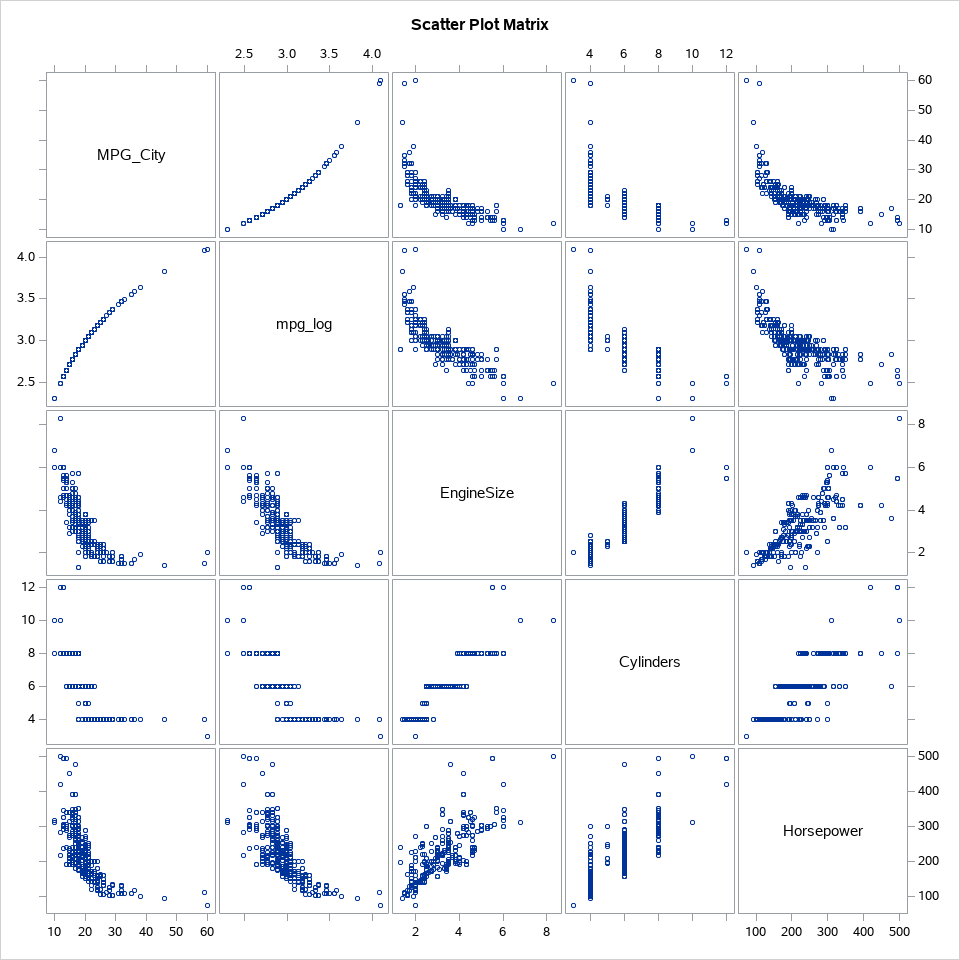

In [ ]:
sas.submitLST("""
ods graphics on;
title 'Correlation analysis';
proc corr data=new2 PLOTS(MAXPOINTS=30000)=matrix;
var mpg_city mpg_log enginesize cylinders horsepower weight;
title 'Correlation analysis MPG vs MPG_log';
run;
""")

As seen in the correlation coefficient table above, the correlation improves with the log transformation of mileage_city.


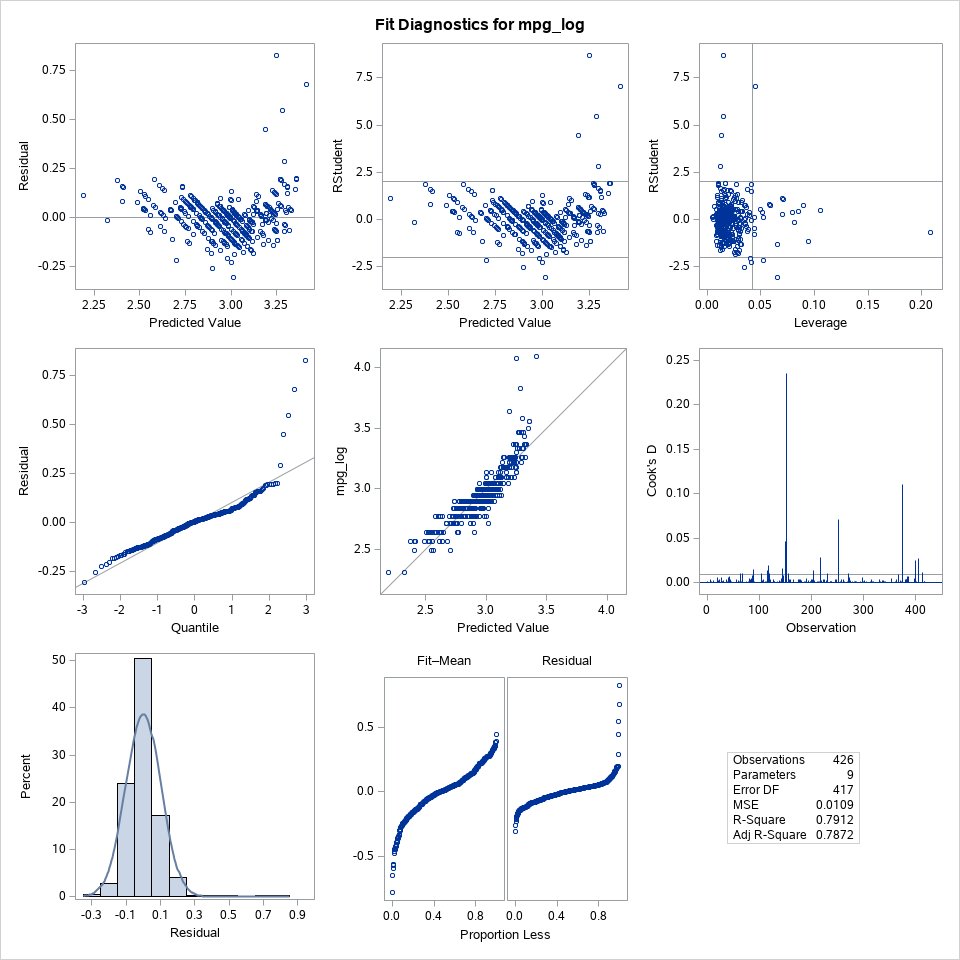
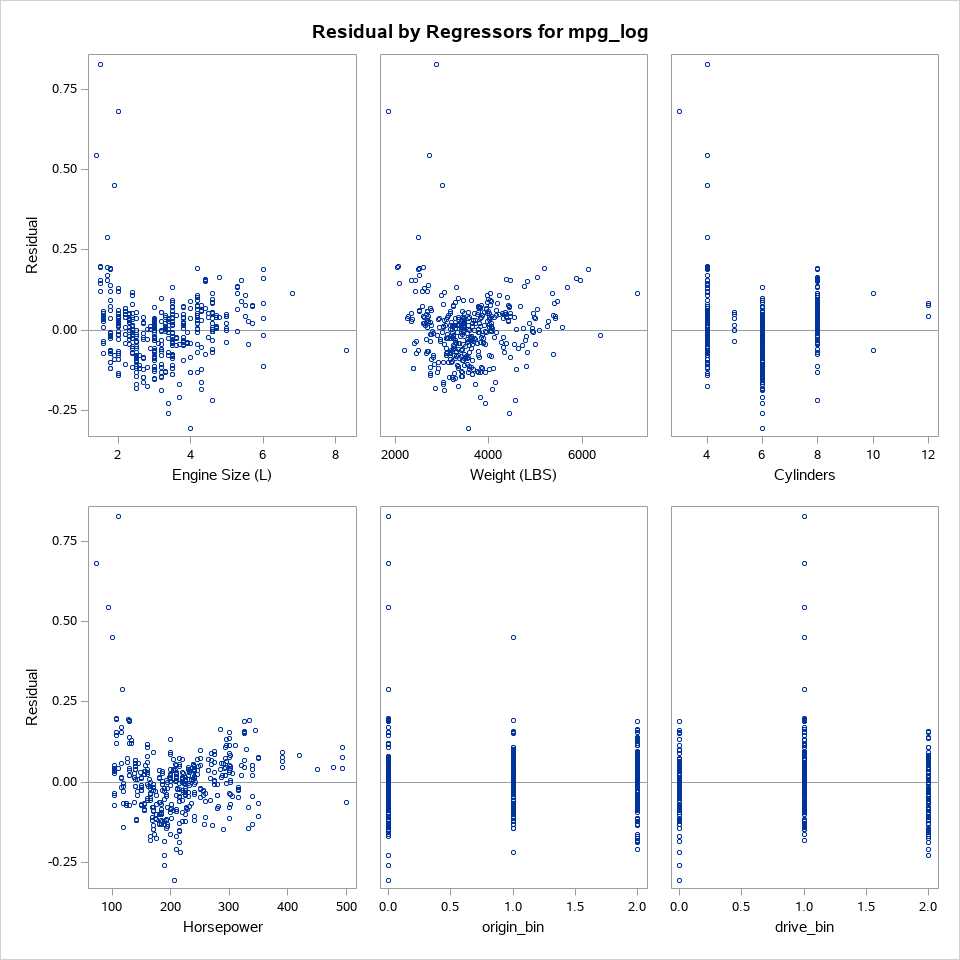
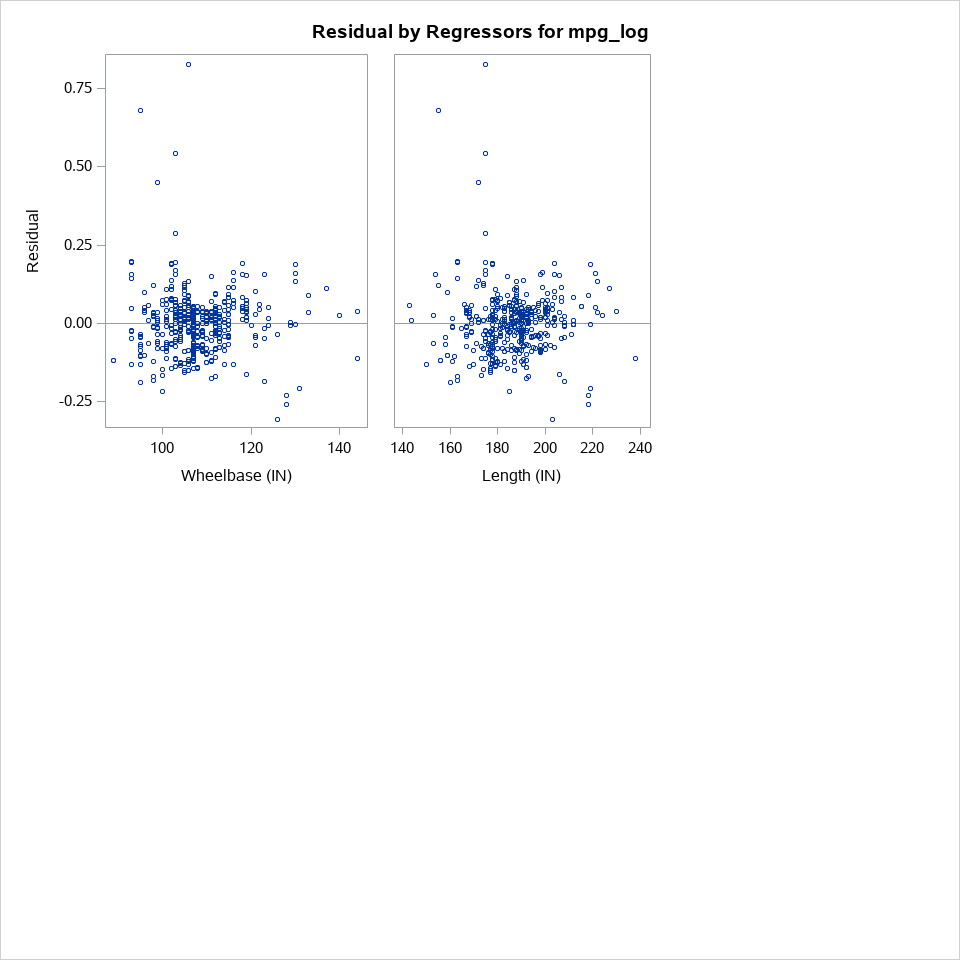

In [ ]:
sas.submitLST("""

proc reg data=new2;
  model make ;

   model mpg_log = enginesize weight cylinders horsepower origin_bin drive_bin wheelbase length;
title 'Regression analysis based on log transform of mpg_city';
run;
""")

Data Set,WORK.NEW2
Dependent Variable,mpg_log
Selection Method,Stepwise
Select Criterion,Significance Level
Stop Criterion,Significance Level
Choose Criterion,PRESS
Entry Significance Level (SLE),0.15
Stay Significance Level (SLS),0.15
Effect Hierarchy Enforced,None
Number of Observations Read,428
Number of Observations Used,426

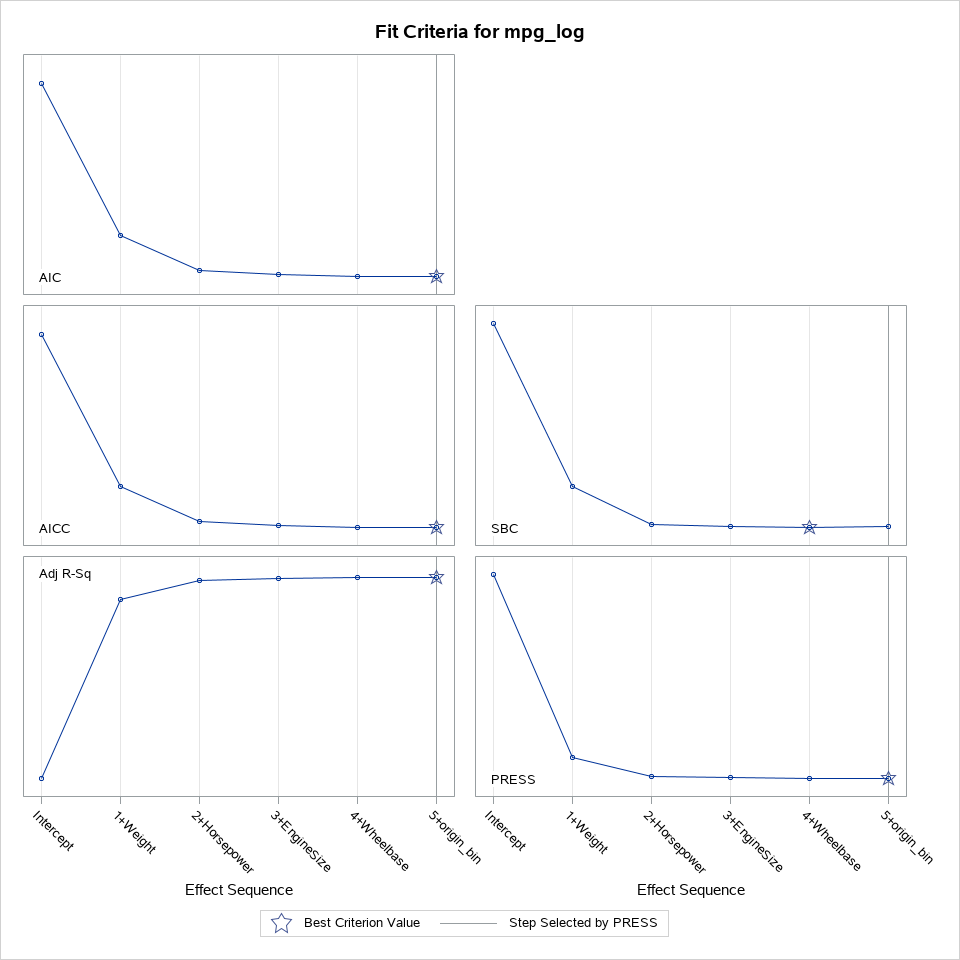

In [ ]:
sas.submitLST("""
ods graphics on;

proc glmselect data=new2 plot=CriterionPanel;
   model mpg_log = enginesize weight cylinders horsepower origin_bin drive_bin wheelbase length
                / selection=stepwise(select=SL choose=PRESS);;
                title 'STEPWISE FEATURE SELECTION';
run;
""")